Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [2]:
# cell for imports. All imports must go here.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = "/content/drive/MyDrive/train.csv"
titanic = pd.read_csv(path, sep=",")
titanic.info()
titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

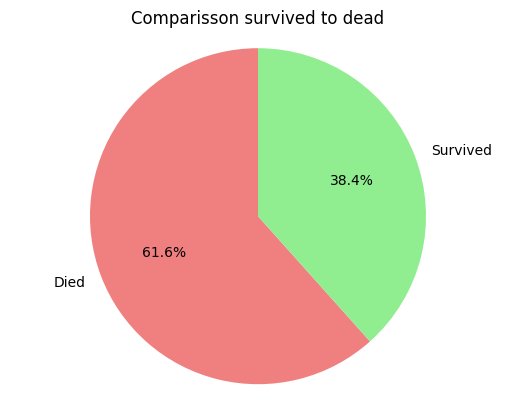

In [16]:
survived_counts = titanic["Survived"].value_counts()
plt.pie(survived_counts, labels=["Died", "Survived"], autopct="%1.1f%%", startangle=90, colors=["lightcoral", "lightgreen"])
plt.title("Comparisson survived to dead")
plt.axis("equal")
plt.show()

Я отримав кругову діаграму співвідношення виживших до загиблих. З неї видно що загинула більша частина пасажирів,а саме 61.6 відсотки,вижили ж 38.4%. Обрав червоний та зелений кольори для більш наглядної демонстрації та більшого контрасту.Сама діаграма є простенькою пай діаграмою

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


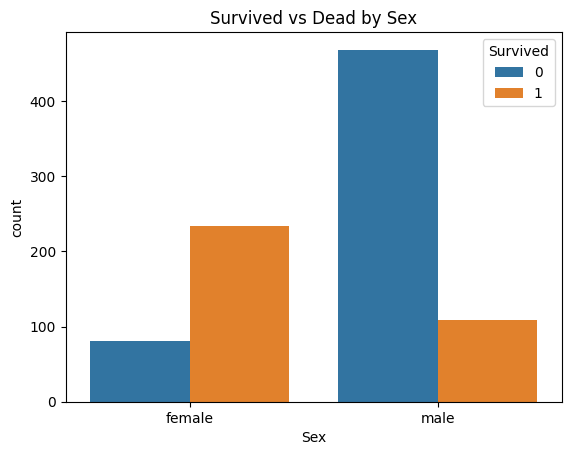

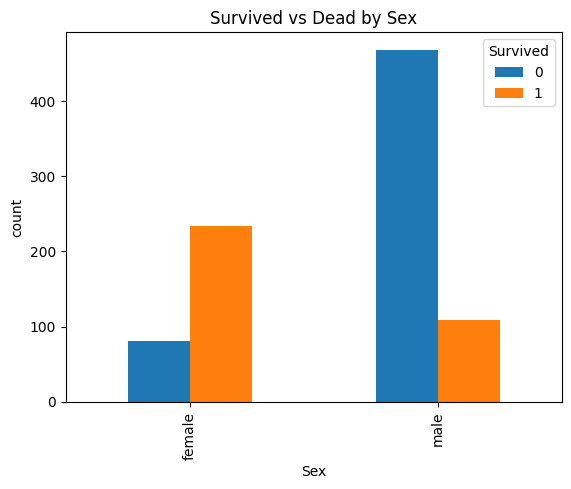

In [17]:
surv_sex = titanic.groupby(["Sex", "Survived"], as_index=False).size()

surv_sex = surv_sex.pivot(index="Sex", columns="Survived", values="size").reset_index()

surv_sex.plot(x="Sex", kind="bar")

plt.xlabel("Sex")
plt.ylabel("count")
plt.title("Survived vs Dead by Sex")

plt.show()


Я отримав порівняння виживших та загинувших ,базуючись на статі, і визначив, що чоловіків загинуло значно більше, і вони становлять домінуючий процент серед загальної кількості втрат . Водночас жінки переважно вижили, їх вижило вдвічі більше ніж чоловіків. Це є очевидним, адже при порятунку першими рятували жінок та дітей. Також можна відзначити, що загалом, чоловіків було більш як у два раза більше. Сама табличка складається з легенди, двох осей(статі та кількості), одна з яких приймає два значення, а інша значення від 0 до 400+

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

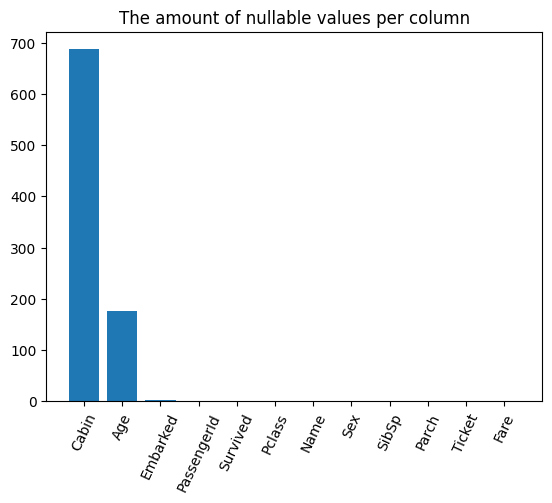

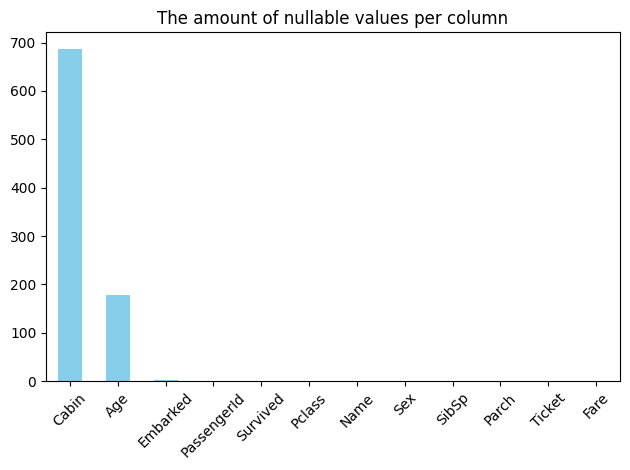

In [18]:
missing_values = titanic.isnull().sum().sort_values(ascending=False)

missing_values.plot(kind="bar", color="skyblue")

plt.title("The amount of nullable values per column")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Я отримав діаграму яка показує кількість пропущених значень у кожній зі змінних. На діаграмі видно що з величезним відривом  "лідирує" змінна "Cabin", де спостерігається майше 700 пропущених значень, далі йде "Age", з майже двома сотнями пропусків і потім "Embarked",по маленьому розміру якої можна сказати, що пропущено буквально кілька значень. Сама діаграма, складається з двох осей, вісь y містить шкалу кількості, шкала x назви всіх колонок наданого dataframe

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

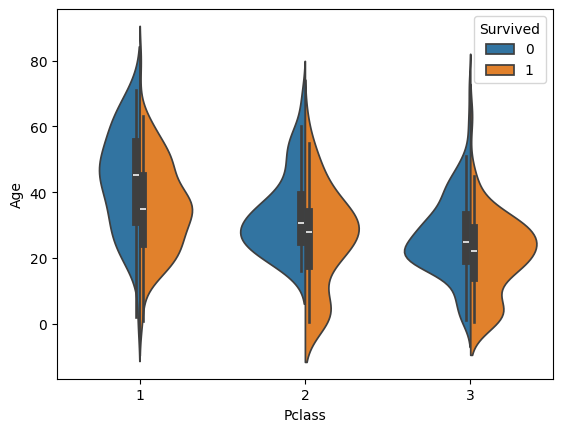

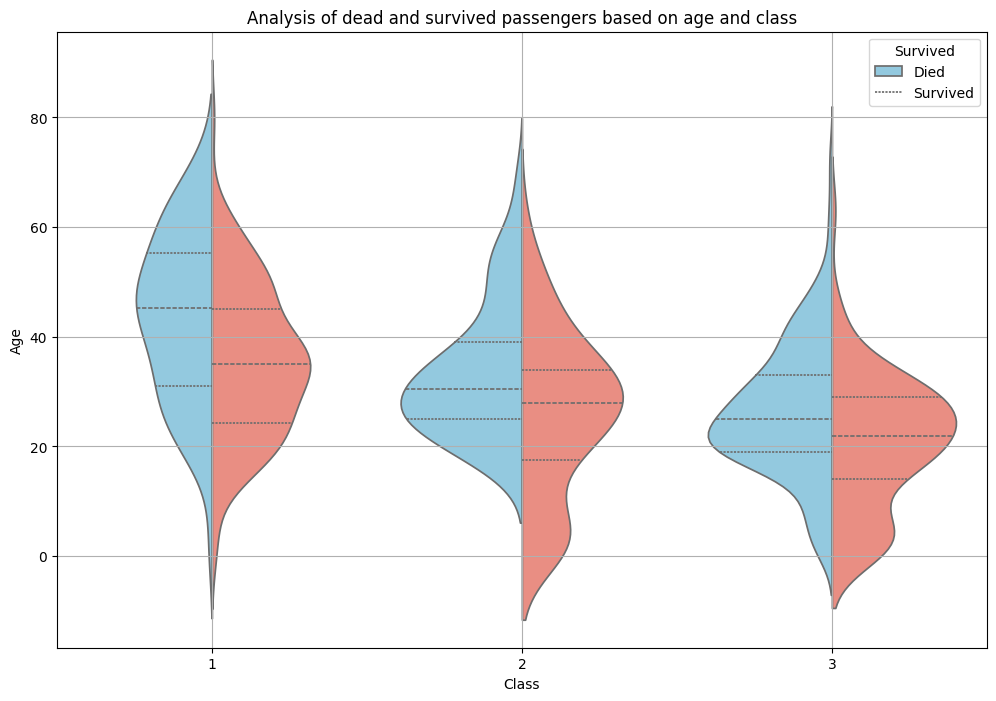

In [39]:


plt.figure(figsize=(12, 8))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=titanic, split=True, palette={0: "skyblue", 1: "salmon"}, inner="quartile")
plt.title("Analysis of dead and survived passengers based on age and class")
plt.xlabel('Class')
plt.ylabel('Age')
plt.legend(title='Survived', loc='upper right', labels=["Died", "Survived"])


plt.grid(True)
plt.show()

Я створив violinplot графік, де проаналізував вкі та сметрність і виживаймість людей на борту титаніка в залежності від класу в якому вони знаходились. Що одразу можна побачити, так це те що чим дорожче клас, тим більше вік. У 3 класі найбільше всього як серед загинувшиз так і серед виживших люди віком 20-27 років, 2 другому класі це число трози більше десь рівно 30, а у 1 класі воно більш варіативне, але всеж, серед виживших найбільше людей віком 45-50, серед загинувших - 35+

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


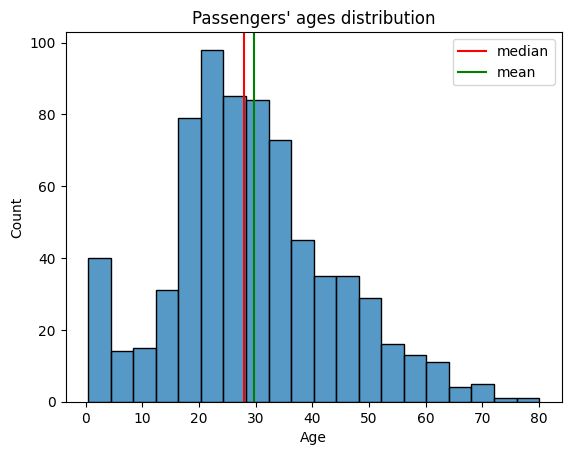

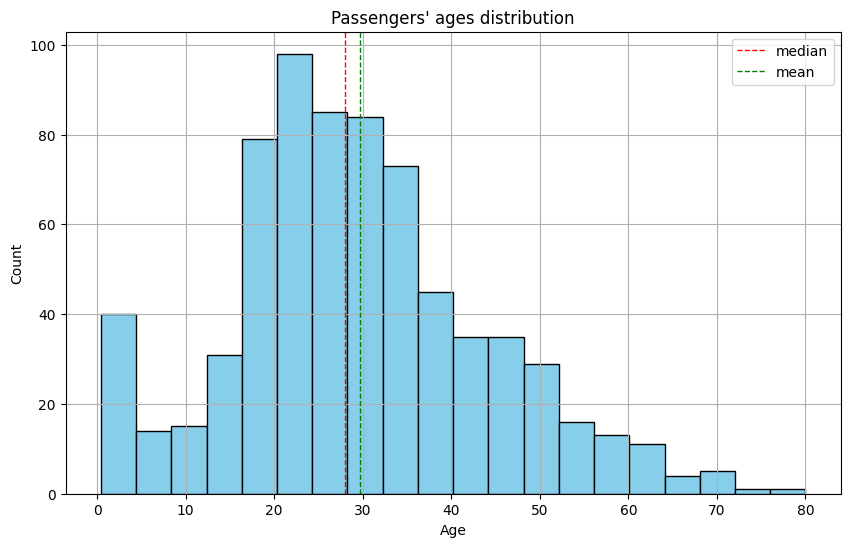

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(titanic["Age"].dropna(), bins=20, color="skyblue", edgecolor="black", label="")

plt.axvline(titanic["Age"].median(), color="red", linestyle="dashed", linewidth=1, label="median")
plt.axvline(titanic["Age"].mean(), color="green", linestyle="dashed", linewidth=1, label="mean")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Passengers' ages distribution")
plt.legend()
plt.grid(True)
plt.show()

Я створив гістограму розподілу частот по віку пасажирів. До діаграми додано медіану та середнє значення. По графіку можна сказати, шо середній вік пасажирів становив близько 30 років, також наймасовішою віковою категорією є 15-35 років. Було коло 40 малюків, та кілька пасажирів віком 70-80. Найбільша кількість пасажирів була у своїх ранніх 20-х роках. Сама діаграма все так само містить дві вісі, ліва з яких має шкалу кількості з 0 до 100, а нижня шкалу віку з 0 до 80

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Побудуйте графік розподілу вартості поїздки у різних класах

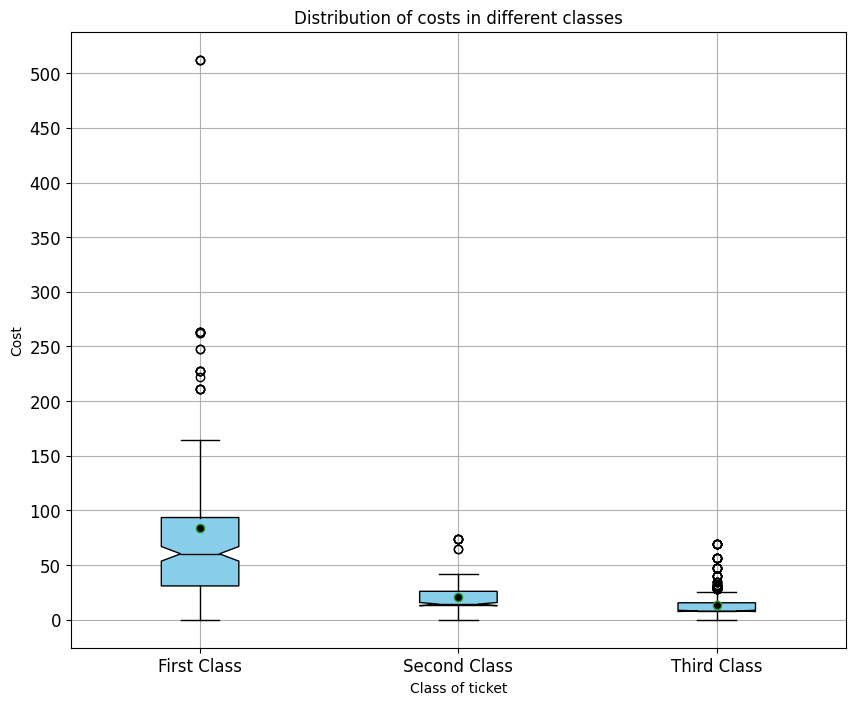

In [35]:
plt.figure(figsize=(10, 8))
plt.boxplot([titanic[titanic["Pclass"] == 1]["Fare"],
             titanic[titanic["Pclass"] == 2]["Fare"],
             titanic[titanic["Pclass"] == 3]["Fare"]],
             labels=["First Class", "Second Class", "Third Class"],
             notch=True, patch_artist=True, showmeans=True, meanprops={"marker": "o", "markerfacecolor": "black"},
             boxprops=dict(facecolor="skyblue", color="black"), whiskerprops=dict(color="black"),
             capprops=dict(color="black"), medianprops=dict(color="black"))

plt.xlabel("Class of ticket")
plt.ylabel("Cost")
plt.title("Distribution of costs in different classes")
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, ticks=range(0, int(titanic["Fare"].max()) + 20, 50))
plt.show()

Я створив boxplot графік для аналізу вартості поїзди в різних класах. Проаналізувавши графік, можна зазначити, що для 3 класу, середня вартість проїзду становила близько 10 доларів, при цьому є доволі великий розмах,адже максимальна ціна за місце 3 класу сягала коло 70 доларів. Для 2 класу все плюс мінус стабільно, ціна здебільшого бігає між 20-30 доларами, і є буквально кілька виходів з норми у вигляді квитків вартості коло 60 і 70 доларів. Для першого класу ціна варіюється зазвичай від +-35 до майже 100 доларів, але є серйозні виключення - квитки вартістю 200-265 доларів та один квиток з вартистью понад 500 доларів.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

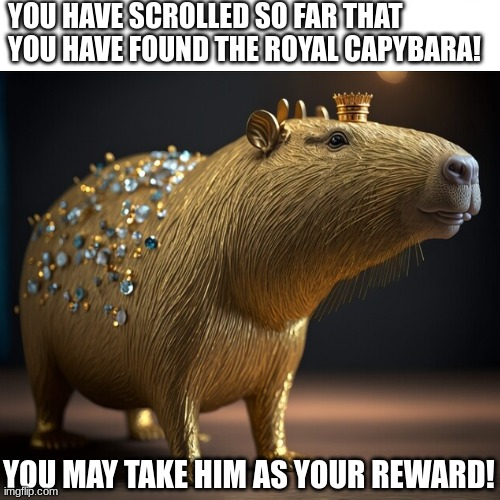